# Final project, Numerical Analysis 2018-2019


## Project description

In this project, we would like to compare the performance of some embarassingly simple algorithms to solve a classification problem based on the MNIST database. 

The abstract aim of the program is to write a function:

```
result = classify(image)
```

that takes as input a small grey scale image of a hand-written digit (from the MNIST database), and returns the digit corresponding to the content of the image.

An example of the images we'll be working on is the following:

![mnist examples](https://m-alcu.github.io/assets/mnist.png)

Some background on the MNIST database (from wikipedia):


## MNIST database

*From Wikipedia, the free encyclopedia*

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

## MNIST sample images.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. There have been a number of scientific papers on attempts to achieve the lowest error rate; one paper, using a hierarchical system of convolutional neural networks, manages to get an error rate on the MNIST database of 0.23%. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support vector machine to get an error rate of 0.8%. An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing images of handwritten digits and characters.

## Algorithm

We start by defining the distance between two images. Ideally, a distance function between two images is zero when the images are the same, and greater than zero when the images are different. 

The bigger the distance, the more different the images should be. Ideally, the distance between an image of the number `9` should be closer to an image of the number `8` than to an image of the number `1` (the digits `9` and `8`, as images, differ by the fact that the first has one closed loop, while the second has two closed loops, while the digit `1` is mostly a straight line). Two different images representing the same number should be even closer (i.e., the distance function should return a "small" number).

Given a distance and a training set of images for which we know everything, the simplest algorithm we can think of to classify an image `z`, is the following: given a set of train images (`x_train`) for which we know the digit they represent (`y_train`), measure the distance between `z` and all images in `x_train`, and classify the image `z` to represent the same digit of the image that is closest to `z` in `x_train`:

Parameters of the algorithm:

- `x_train`
- `y_train`
- a distance function `dist`  

Input of the function

- `z`

Output of the function

- `digit`

where 

```
def classify(z):
    all_distances = array([dist(x, z) for x in x_train])
    digit = y_train[argmin(all_distances)]
    return digit
```

We will experiment with different distances, and we will try to improve the algorithm above in a step by step fashon.

## Data description

Each image in the MNIST dataset represents a hand written digit, in the form of a matrix of `28x28` values between zero and one, representing gray scale values (zero = white, one = black).

We use an array of `60.000x28x28` floating point values to collect all training images, and an array of `60.000` digits containing the (correct) value of the training digits (between 0 and 9 inclusive).

The testing images are instead collected into two arrays of size `10.000x28x28` and `10.0000` respectively.

In [1]:
%pylab inline

# # input image dimensions
# img_rows, img_cols = 28, 28

# # Uncomment the following lines if you have keras installed. Otherwise you can 
# # use the file I uploaded: mnist.npz
#import keras
#from keras.datasets import mnist

# # the data, split between train and test sets
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

# if K.image_data_format() == 'channels_first':
#     x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (img_rows, img_cols)
# else:
#     x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols)
#     input_shape = (img_rows, img_cols)

# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255

# np.savez_compressed('mnist.npz', x_train, y_train, x_test, y_test)

arc = load('mnist.npz')

x_train = arc['arr_0']
y_train = arc['arr_1']
x_test  = arc['arr_2']
y_test  = arc['arr_3']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Populating the interactive namespace from numpy and matplotlib
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Plotting one image

How do we plot the images? `pyplot`, which has been imported by the first line of the previous cell, contains a command called `imshow`, that can be used to plot images. 

In this case we know it is a greyscale image, with zero representing white and one representing black, so we use a colormap that goes from white to black, i.e., `gray_r` where `_r` stands for reversed. 

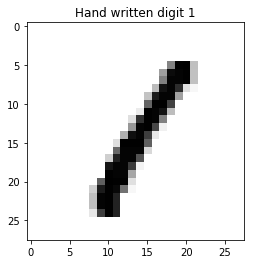

In [2]:
# Show image number 15, and write in the title what digit it should correspond to
N=3
imshow(x_train[N], cmap='gray_r')
_ = title('Hand written digit '+str(y_train[N]))

**IF YOU DON'T HAVE ENOUGH COMPUTATIONAL POWER, RUN THE EXERCISES ONLY UP TO WHAT IS SUSTAINABLE FOR YOUR PC**

General guidelines:

- Time all functions you construct, and try to make them run as fast as possible by precomputing anything that can be precomputed
- Extra points are gained if you reduce the complexity of the given algorithms in any possible way, for example by exploiting linearity, etc.
- If something takes too long to execute, make sure you time it on a smaller set of input data, and give estimates of how long it would take to run the full thing (without actually running it). Plot only the results you manage to run on your PC.

# Assignment 1

Implement the following distance functions

- d_infty $$ d_{\infty}(a,b) := \max_{i,j} |b_{ij}-a_{ij}|$$
- d_one $$ d_1(a,b) := \sum_{i,j} |b_{ij}-a_{ij}|$$
- d_two $$ d_2(a,b) := \sqrt{\sum_{i,j} |b_{ij}-a_{ij}|^2}$$

that take two `(28,28)` images in input, and return a non-negative number.

# Assignment 2

Write a function that, given a number `N`, and a distance function `dist`, computes the distance matrix D of shape `(N,N)` between the first `N` entries of `x_train`:

```
D[i,j] = dist(x_train[i], x_train[j])
```

performing the **minimum** number of operations (i.e., avoid computing a distance if it has already been computed before, i.e., keep in mind that dist(a,b) = dist(b,a)).

# Assignment 3

Compute and plot the three distance matrices

- Dinfty
- D1
- D2

for the first 100 images of the training set, using the function `imshow` applied to the three matrices

# Assignment 4

Using only a distance matrix, apply the algorithm described above and compute the efficency of the algorithm, i.e., write a function that:

Given a distance matrix with shape `(N,N)`, constructed on the first `N` samples of the `x_train` set, count the number of failures of the **leave one out** strategy, i.e., 

- set `error_counter` to zero

- for every line `i` of the matrix:

    - find the index `j` (different from `i`) for which `D[i,k] >= D[i,j]` for all `k` different from `i` and `j`.

    - if `y_train[j]` is different from `y_train[i]`, increment by one `error_counter`

- return the error: error_counter/N

- apply the function above to the 3 different distance matrices you computed before


# Assignment 5

Run the algorithm implemented above for N=100,200,400,800,1600 on the three different distances, and plot the three error rate as a function of N (i.e., compute the distance matrix, and compute the efficiency associated to the distance matrix).

You should get an error like:
```
[[ 0.58      0.17      0.17    ]
 [ 0.52      0.145     0.135   ]
 [ 0.4425    0.15      0.135   ]
 [ 0.4       0.145     0.12875 ]
 [ 0.369375  0.1025    0.09375 ]]
```
where each column represents a different norm.

** In the next assignments, optional points are given if you manage to make the algorithm run faster, by pre-computing everything you can precompute in advance **

# Assignment 6

In principle, it should be possible to decrease the error by using a better norm. From the table above, it is clear that the L2 distance works better than the L1 distance, which works better than the Linfty distance.

However, *none of these distances exploit the fact that the image is a two-dimensional object*, and that there is information also in the **neighboring** information of the pixels. 

One way to exploit this, is to interpret the image as a continuous function with values between zero and one, defined on a square domain `\Omega=[0,27]x[0,27]`.

$$ f: \Omega \to R $$

- Implement a function that computes an approximation of the $H^1$ norm distance on the renormalized images. Given two images $f_1$ and $f_2$
    - Compute $$a = \frac{f_1}{\int_\Omega f_1}$$, $$b=\frac{f_2}{\int_\Omega f_2}$$
    - Define the $H^1$ distance as
    $$
    d_{H^1}(f_1,f_2) := \sqrt{\int_\Omega |\nabla(a-b)|^2+ (a-b)^2}
    $$
    using the algorithm you prefer (or the library you prefer) to compute the gradients and the integrals. Notice that $\nabla f = (\partial f/\partial x, \partial f/\partial y)$ is a vector valued function, and $|\nabla g|^2 := (\partial g/\partial x)^2 + (\partial g/\partial y)^2$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600

## Assignment 7

An even better improvement on the previous distance function is given by the following algorithm

- Given two images $f1$ and $f2$:
    - Compute $$a = \frac{f_1}{\int_\Omega f_1}$$, $$b=\frac{f_2}{\int_\Omega f_2}$$
    - Solve 
    $$
    -\Delta \phi = a - b \qquad \text{ in } \Omega
    $$
    $$
    \phi = 0 \text{ on } \partial\Omega
    $$
    - Define the *Monge Ampere* distance
    $$
    d_{MA}(f_1,f_2) = \int_\Omega (a+b)|\nabla \phi|^2
    $$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600

## Assigment 8 (optional for DSSC, PhD and LM, Mandatory for MHPC)

Use the `BallTree` algorithm (https://en.wikipedia.org/wiki/Ball_tree), from the `sklearn` package, and construct a tree data structure **that uses one of the custom distances defined above**.

For each N in 3200,6400,12800,25600,51200, and for each distance defined above

- Build a tree using the first N entries of the training set `x_train`
- Construct a function that tests the efficiency on all the entries of the test set `x_test`:
    - for any image in `x_test`, call it `x_test[i]`, query the tree for the nearest neighbor (call it `k`), and assign as predicted digit the digit of the `x_train[k]` image, i.e., `y_train[k]`
    - check if `y_train[k]` is equal to the corresponding entry in `y_test[i]`. If not, increment a counter of the error
    - return the efficiency, i.e., `error_counter/len(x_test)`
- Plot, in a single graph, the error of each distance as a function of `N` (including labels, titles, etc.)

- Once you have the tree, experiment with different nearest neighbor algorithms, i.e., instead of taking only one nearest neighbor, take a larger number (a small number of your choice), and instead of returning the single closest digit, return the one with the largest number of occurrences. Plot the same graph you gave before, and see if you gain an improvement. Motivate all choices you have to make to get to the final answer.


**IF YOU DON'T HAVE ENOUGH COMPUTATIONAL POWER, RUN THE EXERCISES ONLY UP TO WHAT IS SUSTAINABLE FOR YOUR PC**

In [3]:
# Assignement 1
#The whole program needs at least a 6 GB RAM machine
from numpy import linalg 

def d_infy(im1,im2):
    ''' Calculates the l-infinity norm'''
    return np.max(np.abs(im2 - im1))
    #slower
    #return np.linalg.norm(np.ravel(im2) - np.ravel(im1),inf)
    
def d_one(im1,im2):
    ''' Calculates l-one norm'''
    return np.sum(np.abs(im2 - im1))
    #return np.linalg.norm(np.ravel(im2) - np.ravel(im1),1)

def d_two(im1,im2):
    ''' Calculates the l-2 norm'''
    return sqrt(np.sum((im2 - im1)**2))
    #return np.linalg.norm(np.ravel(im2) - np.ravel(im1),2)


In [5]:
# Assignement 2

def calc_train_dist(N,t_set,dist_fun):
    '''Calculates the distance matrix'''
    final = np.zeros((N,N))
    for n in range(N):
            for k in range(n+1,N):
                final[n,k] = dist_fun(t_set[n,:,:],t_set[k,:,:])                
    return final + final.T

def calc_train_dist_ind(N,dist_fun,norm_set,grad_set):
    '''Calculate the distance matrix with indexes'''
    final = np.zeros((N,N))
    for n in range(N):
            for k in range(n+1,N):
                final[n,k] = dist_fun(n, k, norm_set, grad_set)                
    return final + final.T

CPU times: user 64.6 ms, sys: 4.26 ms, total: 68.9 ms
Wall time: 69.5 ms
CPU times: user 93.2 ms, sys: 0 ns, total: 93.2 ms
Wall time: 93.1 ms
CPU times: user 65.7 ms, sys: 4.12 ms, total: 69.9 ms
Wall time: 67.9 ms


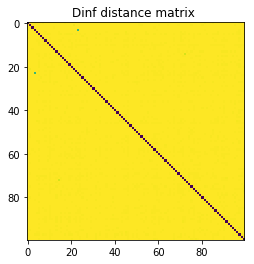

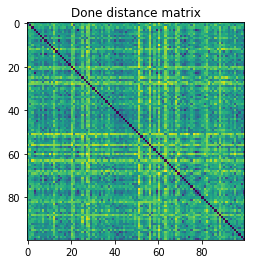

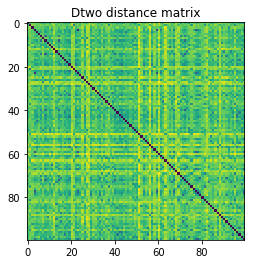

In [6]:
# Assignement 3
#A preview of the similarity matrix
%time Dinf = calc_train_dist(100, x_train, d_infy)
%time Done = calc_train_dist(100, x_train, d_one)
%time Dtwo = calc_train_dist(100, x_train, d_two)

imshow(Dinf)
_ = title('Dinf distance matrix ')
show()
imshow(Done)
_ = title('Done distance matrix')
show()
imshow(Dtwo)
_ = title('Dtwo distance matrix')
show()

In [7]:
# Assignement 4

def LOOC(d_mat,res_train, N = 100):
    '''Calculates the error of the NN classifier'''
    error_counter = 0
    mat = d_mat[:N,:N].copy()
    for i in range(N):
        #exclude the distance with himself, and correct the resulting index
        ind = np.argmin(mat[i,np.arange(mat.shape[1]) != i])
        if ind >= i:
            ind += 1
        if res_train[ind] != res_train[i]:
            error_counter += 1
    return error_counter/N

%time cross_Done = LOOC(Done, y_train)
%time cross_Dtwo = LOOC(Dtwo, y_train)
%time cross_Dinf = LOOC(Dinf, y_train)

CPU times: user 2.45 ms, sys: 237 µs, total: 2.69 ms
Wall time: 1.99 ms
CPU times: user 2.07 ms, sys: 0 ns, total: 2.07 ms
Wall time: 1.81 ms
CPU times: user 3.13 ms, sys: 179 µs, total: 3.31 ms
Wall time: 2.14 ms


In [8]:
# Assignement 5.1
DN = 1600
# precomputation of the distance matrices
%time Dinf2 = calc_train_dist(DN, x_train, d_infy)
%time Done2 = calc_train_dist(DN, x_train, d_one)
%time Dtwo2 = calc_train_dist(DN, x_train, d_two)

CPU times: user 10.7 s, sys: 57 ms, total: 10.8 s
Wall time: 10.8 s
CPU times: user 12.2 s, sys: 36.2 ms, total: 12.2 s
Wall time: 12.2 s
CPU times: user 16.7 s, sys: 12.2 ms, total: 16.7 s
Wall time: 16.7 s


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


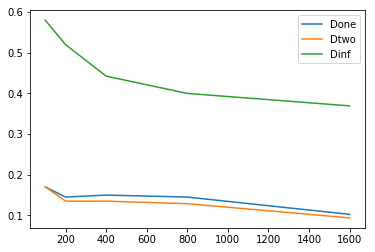

In [9]:
%time
# Assignement 5.2
# Errors for different norms
result_dist = np.zeros((5,3))
Num = [100,200,400,800,1600]
for i in range(5):
    result_dist[i,0] = LOOC(Done2, y_train, N = Num[i])
    result_dist[i,1] = LOOC(Dtwo2, y_train, N = Num[i])
    result_dist[i,2] = LOOC(Dinf2, y_train, N = Num[i])
    
plot(Num, result_dist)
_ = legend(["Done","Dtwo","Dinf"])

In [ ]:
# Assignement 5.3
result_dist

CPU times: user 91 ms, sys: 0 ns, total: 91 ms
Wall time: 91 ms


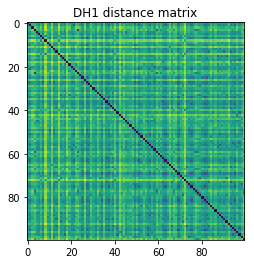

In [10]:
# Assignement 6.1

def normalize(im):
    '''Returns the image normalized by its integral'''
    return im.reshape(28,28)/np.sum(im)

def precalc_grad(data_set):
    '''precalculate the gradient'''
    fin = [np.zeros((2,28,28))] * len(data_set)
    for n in range(len(fin)):
        fin[n]= np.gradient(data_set[n]) 
    return fin

def precalc_norm(data_set):
    '''precalculate the normalized images'''
    fin = [np.zeros((28,28))] * data_set.shape[0]
    for n in range(len(fin)):
        fin[n] = normalize(data_set[n])              
    return fin

def d_H1(ind1,ind2, norm_set,grad_table):
    '''H1 distance'''
    #Just use index and precomputed values
    ind1 = int(ind1)
    ind2 = int(ind2)
    a1,a2 = grad_table[ind1][0], grad_table[ind1][1]
    b1,b2 = grad_table[ind2][0],grad_table[ind2][1]
    return sqrt(np.sum(((a1-b1)**2 + (a2-b2)**2)  + (norm_set[ind1]-norm_set[ind2])**2))
#I also precalculate those of the test to use them in the balltree
norms = precalc_norm(np.vstack((x_train,x_test)))
grads = precalc_grad(norms)
len(norms)
                
%time DH1_p = calc_train_dist_ind(100, d_H1,norms,grads)
imshow(DH1_p)
_ = title('DH1 distance matrix')

CPU times: user 27.2 s, sys: 20.1 ms, total: 27.2 s
Wall time: 27.2 s


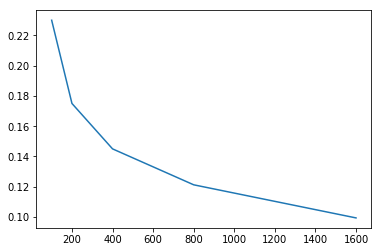

In [11]:
# Assignement 6.2
#errors for H1 norm
%time DH1 = calc_train_dist_ind(DN, d_H1,norms, grads)
result_dist2 = np.zeros((5,))
for i in range(5):
    result_dist2[i] = LOOC(DH1, y_train, N = Num[i])

plot(Num, result_dist2)

CPU times: user 99.6 ms, sys: 0 ns, total: 99.6 ms
Wall time: 99.7 ms


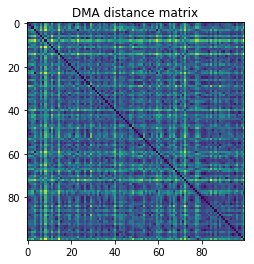

In [12]:
# Assignement 7.1
from scipy.sparse import diags, csc_matrix
from scipy.sparse.linalg import splu
from scipy.linalg import lu_solve


def build_laplacian(N):
    '''construct the matrix for finite differences approximation of the laplacian'''
    mat = diags([1,1,-4,1,1],[-N,-1,0,1,N], shape = (N*N,N*N)).toarray()
    for i in range(0,N*N,N):
        mat[i,i-1] = 0
        mat[i-1,i] = 0
    return mat

lap = build_laplacian(26)
#use sparse matric format
lu = splu(csc_matrix(lap))

def precalc_lapl(norm_set,lu):
    '''Precalculates the different functions phi'''
    fin = [np.zeros((28,28))] * len(norm_set)
    for n in range(len(fin)):
        phi = np.zeros((28,28))
        phi[1:27,1:27] = lu.solve((norm_set[n][1:27,1:27].ravel())).reshape((26,26))
        fin[n] = phi
    return fin
  
def d_ma(ind1,ind2, norm_set,grad_set2):
    '''Morge-Ampere distance with precalculated phi'''
    #thi is required when we use indexes from the balltree
    ind1 = int(ind1)
    ind2 = int(ind2)
    a = norm_set[ind1]
    b = norm_set[ind2]
    aphi1d, aphi2d = grad_set2[ind1][0], grad_set2[ind1][1]
    bphi1d, bphi2d = grad_set2[ind2][0], grad_set2[ind2][1]
    return np.sum(((aphi1d-bphi1d)**2 + (aphi2d-bphi2d)**2)*(a+b))
#precalc phi and gradients
lapl = precalc_lapl(norms,lu)
grads2 = precalc_grad(lapl)
del lapl
%time DMA = calc_train_dist_ind(100, d_ma,norms, grads2)
imshow(DMA)
_ = title('DMA distance matrix')


CPU times: user 25.4 s, sys: 16 ms, total: 25.4 s
Wall time: 25.4 s


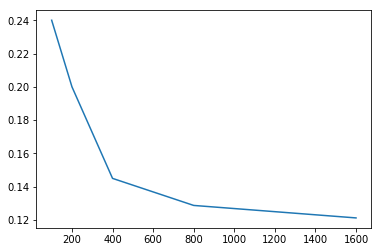

In [13]:
# Assignement 7.2
#errors for Morge-Ampere distance
%time DMA = calc_train_dist_ind(DN, d_ma,norms, grads2)
result_dist3 = np.zeros((5,))
for i in range(5):
    result_dist3[i] = LOOC(DMA, y_train, N = Num[i])

plot(Num, result_dist3)

In [14]:
# Assignement 8.1
# Basically I tried during the exercise to precompute as much as possible,
# as a result this scripts are wasting a lot of memory.
# The BallTree computation is pretty intensive and we are in the order of hours,
# the last part is a better implementation using the wrapper functions in scikit learn.
# The bigger advantage of the KNeighborsClassifier() consists in its parallelization;
# however my pc has only a mid-range-2015 two core CPU, so it does not benefit at all from 
# the multicore support(even though I think it can make the difference on a bigger machine)
# To gain data in a suitable time I have used only 1000 train samples
from sklearn.neighbors import BallTree

def Ballfunctions(i,j):
    '''Construct different balltrees for the different metrics'''
    if(i < 3):
        return BallTree(x_train[:j,:,:].reshape(j,28*28),metric="pyfunc", func = DistanceList[i])
    elif (i == 3):
        return BallTree(np.arange(j).reshape(-1,1),metric="pyfunc",
                        func = DistanceList[i],norm_set = norms,grad_table = grads)
    else:
        return BallTree(np.arange(j).reshape(-1,1),metric="pyfunc",
                        func = DistanceList[i],norm_set = norms,grad_set2 = grads2)

    Num = [3200,6400,12800,25600,51200]
DistanceList = [d_one, d_two, d_infy, d_H1, d_ma ]
#create a nested dict with key = distance and value a dict with key = number of samples and the balltree
DistanceDict = {k:v for k,v in zip(("D1","D2","Dinf","DH1","DMA"), [{}] * 5)}
for i,k in enumerate(DistanceDict.keys()):
    BallTrees = [Ballfunctions(i,j) for j in Num]
    DistanceDict[k] = {k:v for k,v in zip(Num,BallTrees)}
    


In [22]:
# Assignement 8.2

def ball_LOOCV(res_train,data_test,res_test,dlist,Nlist, k=1, indx = False):
    '''Classification error of NN for the ball tree, when k > 1, we use the mode of the neighbors'''
    error_counter_list = []
    for n in Nlist:
        error_counter = 0
        if k == 1:
            for i in range(0,len(res_test),10):
                idx = 0
                # change from index two images distance to precalculated
                if indx:
                     idx = dlist[n].query(np.array([i + 60000]).reshape(1,-1),return_distance = False)[0][0]
                else:
                     idx = dlist[n].query(data_test[i].reshape(1,-1),return_distance = False)[0][0]
                if res_train[idx] != res_test[i]:
                    error_counter += 1
            error_counter_list.append(error_counter/(len(res_test)/10))
        else:
            for i in range(0,len(res_test),10):
                idx = 0
                if indx:
                     idx = dlist[n].query(np.array([i + 60000]).reshape(1,-1),return_distance = False, k = k)[0]
                else:
                     idx = dlist[n].query(data_test[i].reshape(1,-1),return_distance = False, k =k)[0]
                #take the mode
                counts = np.bincount(res_train[idx])
                num = np.argmax(counts)
                if num != res_test[i]:
                    error_counter += 1
                error_counter_list.append(error_counter/(len(res_test)/10))
    return error_counter_list

In [15]:
#Pretty slow
plot_list = []
for i,dist in enumerate(("D1","D2","Dinf","DH1","DMA")):
    flag = False
    if dist == "DH1" or dist == "DMA":
        flag = True
    %time plot_list.append(ball_LOOCV(y_train,x_test,y_test,DistanceDict[dist],Num,1, flag))

3200
6400
12800
25600
51200
CPU times: user 16min 44s, sys: 72.1 ms, total: 16min 45s
Wall time: 16min 45s
3200
6400
12800
25600
51200
CPU times: user 23min 42s, sys: 76 ms, total: 23min 42s
Wall time: 23min 42s
3200
6400
12800
25600
51200
CPU times: user 14min 42s, sys: 16 ms, total: 14min 42s
Wall time: 14min 42s
3200
6400
12800
25600
51200
CPU times: user 40min 12s, sys: 108 ms, total: 40min 12s
Wall time: 40min 12s
3200
6400
12800
25600
51200
CPU times: user 38min 44s, sys: 148 ms, total: 38min 44s
Wall time: 38min 45s


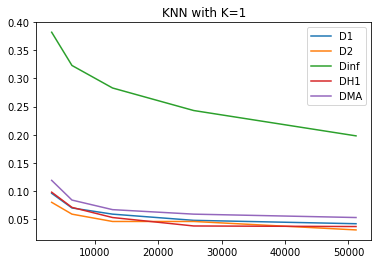

In [16]:
plot(Num,np.array(plot_list).T)
_ = title("KNN with K=1")
_ = legend(["D1","D2","Dinf","DH1","DMA"])

In [ ]:
# Assignement 8.3
#senza dubbio non è molto elegante
plot_list2 = []
for i,dist in enumerate(("D1","D2","Dinf","DH1","DMA")):
    flag = False
    if dist == "DH1" or dist == "DMA":
        flag = True
    %time plot_list2.append(ball_LOOCV(y_train,x_test,y_test,DistanceDict[dist],Num,100, flag))

CPU times: user 15min 8s, sys: 87.9 ms, total: 15min 8s
Wall time: 15min 9s


KeyboardInterrupt: 

In [ ]:
plot(Num,np.array(plot_list2).T)
_ = title("KNN with K=100")
_ = legend(["D1","D2","Dinf","DH1","DMA"])

In [ ]:
# Assignement 8 bis
#Attention this snippet uses all of the available cores, set n_jobs accordingly
#This is the same thing as before, just using the wrapper interface from sklearn
from sklearn.neighbors import BallTree
from sklearn.neighbors import KNeighborsClassifier
def Ballfunctions(i,j,k = 1):
    '''Construct different balltrees for the different metrics'''
    if(i < 3):
        return KNeighborsClassifier(n_neighbors=k, leaf_size = 100,
                                    algorithm = "ball_tree",
                                    metric= DistanceList[i], n_jobs = -1).fit(x_train[:j,:,:].reshape(j,28*28),y_train[:j])
    elif (i == 3):
        return KNeighborsClassifier(n_neighbors=k, leaf_size = 100,
                                    algorithm = "ball_tree",
                                    metric = DistanceList[i], metric_params = {
                                    "norm_set" : norms,
                                    "grad_table" : grads}, n_jobs = -1).fit(np.arange(j).reshape(-1,1), y_train[:j])
    else:
        return KNeighborsClassifier(n_neighbors=k, leaf_size = 100,
                                    algorithm = "ball_tree",
                                    metric = DistanceList[i],
                                    metric_params = {"norm_set" : norms,
                                    "grad_set2" : grads2}, n_jobs = -1).fit(np.arange(j).reshape(-1,1), y_train[:j])
Num = [3200,6400,12800,25600,51200]
DistanceList = [d_one, d_two, d_infy, d_H1, d_ma ]
#create a nested dict with key = distance and value a dict with key = number of samples and the balltree
DistanceDict = {k:v for k,v in zip(("D1","D2","Dinf","DH1","DMA"), [{}] * 5)}
for i,k in enumerate(DistanceDict.keys()):
    BallTrees = [Ballfunctions(i,j) for j in Num]
    DistanceDict[k] = {k:v for k,v in zip(Num,BallTrees)}

In [ ]:
plot_list = []
for i in ("D1","D2","Dinf","DH1","DMA"):
    dist_list = []
    if i == "D1" or i == "D2" or i == "Dinf":
        for n in Num:
            %time dist_list.append(DistanceDict[i][n].score(x_test.reshape(-1,28*28), y_test))
    else:
        for n in Num:
            %time dist_list.append(DistanceDict[i][n].score(np.arange(60000,70000).reshape(-1,1), y_test))
    plot_list.append(dist_list)